# Laboratorio 3 Regresión Logística 
## Elements of Machine Learning 
## José Alejandro Guzmán Zamora 

In [1]:
"""
Libraries I'm going to be using in the lab. Important to 
note that the logistic library contains the implementation
of the Logistic Regression algorithm using Gradient 
Descent and the logisticop library is a module that contains
that same algorithm but using the scipy optimization. 
"""
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import logistic
import logisticop 
from sklearn.model_selection import train_test_split

In [2]:
"""
Reading the dataset and starting to show some initial 
information for the exploration of the data. 
"""
data = pd.read_csv('./heart.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
"""
Data overview. This helps to get a general view of 
some details about the data. Later on I could use the 
value_counts() algorithm to get specific distribution
based on amounts of values used in each column. 
"""
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Dataset Distributions


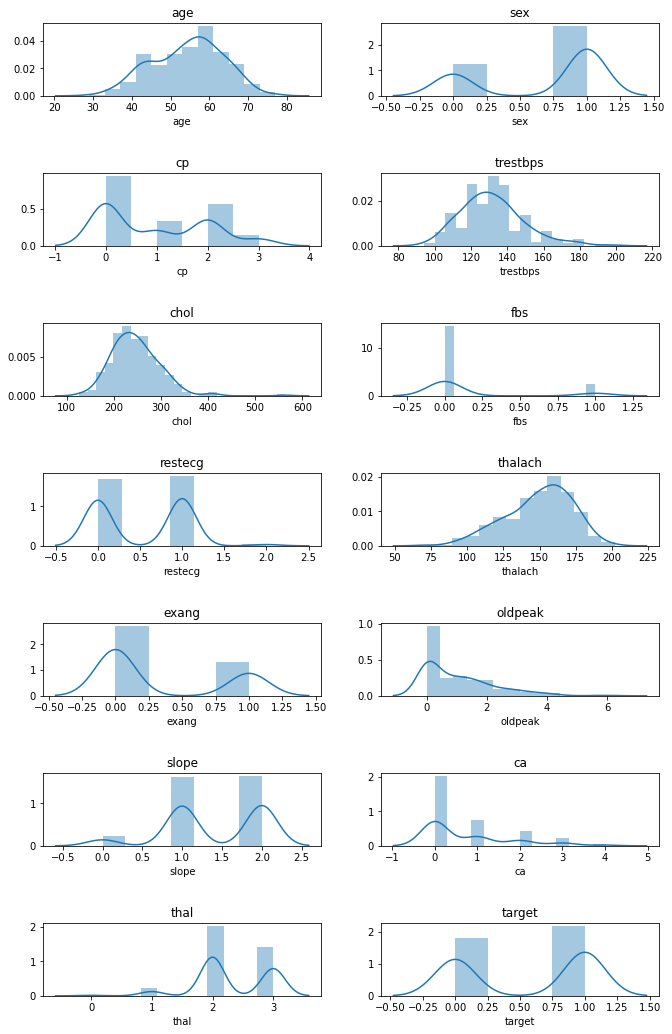

In [4]:
def distribution(data):
    """
    Plots the Distribution of a Dataset. 
    
    Args:
        - data: pandas DataFrame representing the 
        dataset 
    Returns:
        - visualization: distribution of each variable
    """
    axis = []
    cont = 1
    fig = plt.figure(figsize=(10,15))
    for i in data:
        axtemp = fig.add_subplot(7,2,cont)
        fig.tight_layout(pad=3.0)
        sns.distplot(data[i])
        plt.title(i)
        cont += 1
    plt.show()
    
def correlations(data, y):
    """
    Scatter Plots of Variables in Dataset. 
    
    Args:
        - data: pandas Dataframe with the dataset 
        - y: response variable or column 
    Returns:
        - visualization: scatter plot of every 
        variable with the response variable 
    """
    axis = []
    cont = 1
    fig = plt.figure(figsize=(10,10))
    for i in data:
        axtemp = fig.add_subplot(7,2,cont)
        fig.tight_layout(pad=3.0)
        plt.scatter(data[i], data[y])
        plt.title(i)
        cont += 1
    plt.show()

"""
Start off by plotting the distribution of every variable in the 
dataset. We can see the following:
* Age almost represents a normal distribution 
* Trestbps and chol seem like normal distributions with positive
skews 
* thalach is also a pseudo normal distribution but with negative 
skew 
* Oldpeak and ca seem to have logarithmic distributions 
"""

print("Dataset Distributions")
distribution(data)

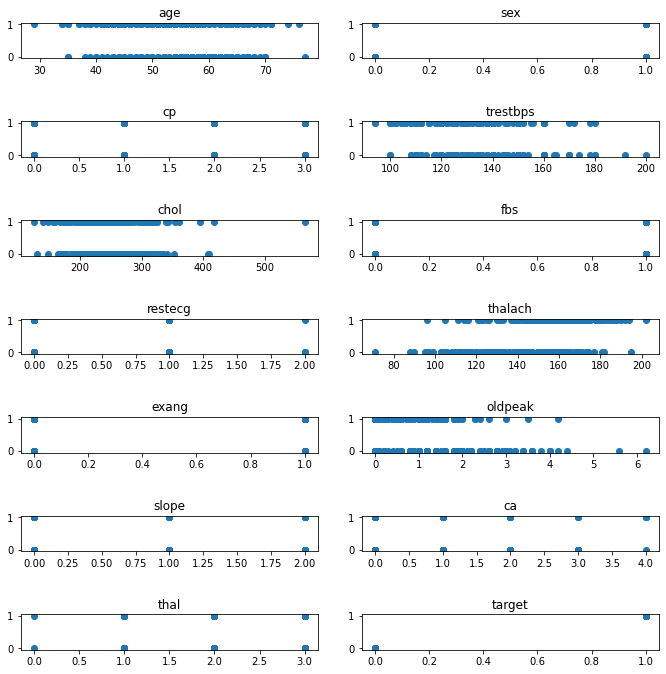

In [5]:
"""
Show the scatter plots of each of the variables vs the 
response variable or target. 
"""

correlations(data, 'target')

In [6]:
"""
In order to start evaluating the models we also have to calculate
the minimum cost of each one. 
"""
def costo_simple(variables, thetas):
    """
    Calculate the Cost of a LR Model.
    
    Args:
        - variables: text of the variables to evaluate 
        - thetas: coefficients 
    returns:
        - cost: total cost of the model 
    """
    ones = np.expand_dims(np.asarray([1 for i in range(len(x_test[variables]))]), 1)
    siguiente = np.expand_dims(x_test[variables], 1)
    entrada = np.hstack([ones, siguiente])
    costo = logistic.cost(entrada, y_test, thetas)
    return costo  

In [7]:
"""
Start with a simple regression model that tries to predict
based only on one variable. 
"""

def prueba_simple(equis, ye, variable, it):
    """
    Run Logistic Regression based on One Variable. 
    
    Args:
        - equis: DataFrame with all of the columns
        - ye: column with the dependent or response variable 
        - thetas: coefficients to start with 
        - variable: text of the name of the independent 
        variable 
    Returns:
        - res: coefficients of the model 
    """
    limite_inferior = min(equis[variable])
    limite_superior = max(equis[variable])
    x1 = equis[variable]
    y = ye['target']
    unos = np.asarray([1 for i in range(x1.shape[0])])
    xes = np.vstack([unos, x1]).transpose()
    y = np.expand_dims(y,1)
    res = logisticop.optimize_log2(xes, y, it)
    # Continue to setup the plotting 
    xl = np.linspace(limite_inferior - 5,limite_superior + 5,200)
    y = 1 / (1 + (np.e ** -(res[0] + xl * res[1])))
    # Graph 
    print(costo_simple(variable, res))
    plt.scatter(equis[variable], ye['target'])
    plt.plot(xl, y)
    plt.title("Sigmoid Function with " + variable)
    plt.show()
    return res

In [8]:
"""
Same algorithm as the past cell, the difference is that this one 
uses the gradient_descent method to optimize the cost. Therefore, 
it needs alpha and number of iterations as parameters. 
"""

def prueba_manual(equis, ye, thetas, variable, alpha, it):
    thetas = np.asarray(thetas, dtype='float64').reshape(len(thetas), 1)
    limite_inferior = min(equis[variable])
    limite_superior = max(equis[variable])
    x1 = equis[variable]
    y = ye['target']
    unos = np.asarray([1 for i in range(x1.shape[0])])
    xes = np.vstack([unos, x1]).transpose()
    y = np.expand_dims(y,1)
    res = logistic.gradient_descent(xes, y, thetas, alpha, it)
    ok = res[len(res) - 1]
    # Continue to setup the plotting 
    xl = np.linspace(limite_inferior - 5,limite_superior + 5,200)
    y = 1 / (1 + (np.e ** -(ok[0][0] + xl * ok[0][1])))
    # Graph 
    print(ok[1])
    plt.scatter(equis[variable], ye['target'])
    plt.plot(xl, y)
    plt.title("Sigmoid Function with " + variable)
    plt.show()
    res = list(res[len(res) - 1])
    res.append(variable)
    return res

In [9]:
"""
Split the dataset into the training and testing parts. The proportion
I decided to use is 0.8 for training and 0.2 for testing. 
"""

data_partida = data.copy()
response = pd.DataFrame(data_partida['target'])
xes = data_partida.drop('target', 1)

x_train, x_test, y_train, y_test = train_test_split(xes, response, test_size=0.20, random_state=42)
resultados = []

target    0.696222
dtype: float64


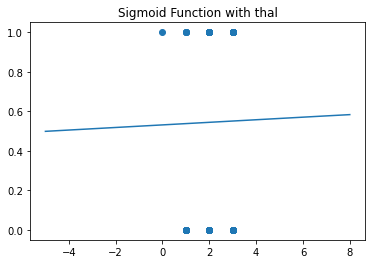

In [18]:
prueba = prueba_simple(x_train, y_train, 'thal', 1)

In [1]:
"""
Run the algorithm on all of the variables and start comparing 
the costs of each one. 
"""

for i in x_test:
    te = [0,0]
    res = prueba_manual(x_train, y_train, te, i, 0.001, 100000)
    resultados.append(res)

NameError: name 'x_test' is not defined

In [2]:
"""
This cell orders the costs to get the variables that got to the lowest
values on top. As you can see, the variable that got to the lower cost
is oldpeak, this variable explains the ST depression induced by 
exercise relative to rest. Since this is a classification problem, we can not
evaluate the model on cost alone, that's why we are going to use the 
confussion matrix in the next few cells. 
"""

ordenados = sorted(resultados, key=lambda tup: tup[1])
ordenados

NameError: name 'resultados' is not defined

In [20]:
"""
Piece of code to calculate the confusion matrix of each variable. 
"""
import sklearn.metrics as m

def c_matrix(variable, thetast):
    """
    Calculate Confusion Matrix. 
    
    Args:
        - variable: the text or list of variables to take into account 
        - thetast: the coefficients 
    Returns:
        - Confusion Matrix 
    """
    unitos = np.asarray([1 for i in range(len(x_test))]).reshape(len(x_test), 1)
    if isinstance(variable, str):
        siguiente = np.expand_dims(x_test[variable],1)
    else:
        siguiente = x_test[variable]
    unidos = np.hstack([unitos,siguiente]) 
    hipotesis_prueba = logisticop.logistic(unidos, thetast)
    resultado_temp = [1 if i >= 0.5 else 0 for i in hipotesis_prueba]
    return m.confusion_matrix(y_test, resultado_temp)

In [27]:
"""
Get some insights from the correlation matrices. 
"""

"""
Recall shows the proportion of the actual positive class that we got correct. 
The higher the value the better. 
"""
def recall(mat):
    return mat[0][0] / (mat[0][0] + mat[1][0])

"""
Precision shows the proportion of positive predictions that are actually 
positive, this number should also be high. 
"""
def precision(mat):
    return mat[0][0] / (mat[0][0] + mat[0][1])

"""
General proportion of correct ones. Should be aiming for 1. 
"""
def accuracy(mat):
    return (mat[0][0] + mat[1][1]) / sum(sum(mat))

In [26]:
# Evaluar el que menor costo tiene 

for i in ordenados:
    matriz = c_matrix(i[2],i[0])
    print("Matrix for " + i[2])
    print(matriz)
    print("\nRecall: " + str(recall(matriz)))
    print("Precision: " + str(precision(matriz)))
    print("Acurracy: " + str(accuracy(matriz)) + "\n")

Matrix for oldpeak
[[17 12]
 [ 7 25]]

Recall: 0.7083333333333334
Precision: 0.5862068965517241
Acurracy: 0.6885245901639344

Matrix for exang
[[17 12]
 [ 6 26]]

Recall: 0.7391304347826086
Precision: 0.5862068965517241
Acurracy: 0.7049180327868853

Matrix for cp
[[26  3]
 [ 7 25]]

Recall: 0.7878787878787878
Precision: 0.896551724137931
Acurracy: 0.8360655737704918

Matrix for ca
[[21  8]
 [ 9 23]]

Recall: 0.7
Precision: 0.7241379310344828
Acurracy: 0.7213114754098361

Matrix for slope
[[24  5]
 [12 20]]

Recall: 0.6666666666666666
Precision: 0.8275862068965517
Acurracy: 0.7213114754098361

Matrix for thal
[[22  7]
 [ 6 26]]

Recall: 0.7857142857142857
Precision: 0.7586206896551724
Acurracy: 0.7868852459016393

Matrix for sex
[[25  4]
 [23  9]]

Recall: 0.5208333333333334
Precision: 0.8620689655172413
Acurracy: 0.5573770491803278

Matrix for age
[[ 6 23]
 [ 6 26]]

Recall: 0.5
Precision: 0.20689655172413793
Acurracy: 0.5245901639344263

Matrix for restecg
[[ 0 29]
 [ 0 32]]

Recall: 

c:\users\joseg\onedrive - universidad francisco marroquin\cs7\env\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in longlong_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [207]:
def prueba_multiple(equis, ye, thetas, variables, alpha, it):
    """
    Linear Regression for Multiple Independent Variables. 
    """
    thetas = np.asarray(thetas, dtype='float64').reshape(len(thetas), 1)
    x1 = equis[variables]
    y = ye['target']
    unos = np.expand_dims(np.asarray([1 for i in range(x1.shape[0])]),1)
    xes = np.hstack([unos, x1])
    y = np.expand_dims(y,1)
    res = logisticop.optimize_log(xes, y, thetas)
    return res